In [23]:
import geopandas as gpd
import pandas as pd
import os
path1 = "/Users/qilinzhou/Desktop/PreK/PreK Visualization/Result"
path2 = "/Users/qilinzhou/Desktop/PreK/PreK Enrollment&Funding/Data"


In [24]:
os.chdir(path1)
geo_preschool_assess = pd.read_csv("geospatial_preK_assessment.csv", keep_default_na=False)

In [25]:
geo_preschool_assess.head()

,State,RequiredAssessmentforpreK,Year,STUSPS,state_fips,REGION,DIVISION,STATEFP,STATENS,GEOID,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,ALABAMA,Multiple Assessments,2007-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
1,ALABAMA,Required assessment instruments are determined...,2008-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
2,ALABAMA,Multiple Assessments,2009-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
3,ALABAMA,Multiple Assessments,2010-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."
4,ALABAMA,Multiple Assessments,2011-01-01,AL,1,3,6,1,1779775,1,Alabama,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34...."


In [26]:
geo_preschool_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      714 non-null    object 
 1   RequiredAssessmentforpreK  714 non-null    object 
 2   Year                       714 non-null    object 
 3   STUSPS                     714 non-null    object 
 4   state_fips                 714 non-null    int64  
 5   REGION                     714 non-null    int64  
 6   DIVISION                   714 non-null    int64  
 7   STATEFP                    714 non-null    int64  
 8   STATENS                    714 non-null    int64  
 9   GEOID                      714 non-null    int64  
 10  NAME                       714 non-null    object 
 11  LSAD                       714 non-null    int64  
 12  MTFCC                      714 non-null    object 
 13  FUNCSTAT                   714 non-null    object 

In [27]:
geo_preschool_assess.Year = geo_preschool_assess.Year.astype('datetime64[ns]')

In [28]:
geo_preschool_assess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State                      714 non-null    object        
 1   RequiredAssessmentforpreK  714 non-null    object        
 2   Year                       714 non-null    datetime64[ns]
 3   STUSPS                     714 non-null    object        
 4   state_fips                 714 non-null    int64         
 5   REGION                     714 non-null    int64         
 6   DIVISION                   714 non-null    int64         
 7   STATEFP                    714 non-null    int64         
 8   STATENS                    714 non-null    int64         
 9   GEOID                      714 non-null    int64         
 10  NAME                       714 non-null    object        
 11  LSAD                       714 non-null    int64         
 12  MTFCC   

In [29]:
os.chdir(path2)
prek_enroll_fund = pd.read_csv("2007-2020_enroll_fund.csv", keep_default_na=False)

In [30]:
# Now convert the 'Year' column to datetime format with January 1st as the default date
prek_enroll_fund['Year'] = pd.to_datetime(prek_enroll_fund['Year'], format='%Y')

In [31]:
prek_enroll_fund.head()

,Year,STATE,PreK Enrollment,Reported Spending Per Child in PreK
0,2007-01-01,Oklahoma,34375,6731
1,2007-01-01,New Jersey,45499,10494
2,2007-01-01,Connecticut,8532,9577
3,2007-01-01,Florida,124390,2335
4,2007-01-01,Iowa,2033,8966


In [32]:
prek_enroll_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 4 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Year                                 709 non-null    datetime64[ns]
 1   STATE                                709 non-null    object        
 2   PreK Enrollment                      709 non-null    int64         
 3   Reported Spending Per Child in PreK  709 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 22.3+ KB


In [33]:
# Applying the condition
prek_enroll_fund.loc[prek_enroll_fund["STATE"] == "D.C.", "STATE"] = "District of Columbia"

In [34]:
geo_preschool_assess['State_lower'] = geo_preschool_assess['State'].str.lower()
prek_enroll_fund['STATE_lower'] = prek_enroll_fund['STATE'].str.lower()
prek_enroll_fund.rename(columns={"STATE_lower": "State_lower"}, inplace=True)

In [35]:
prek_enroll_fund

,Year,STATE,PreK Enrollment,Reported Spending Per Child in PreK,State_lower
0,2007-01-01,Oklahoma,34375,6731,oklahoma
1,2007-01-01,New Jersey,45499,10494,new jersey
2,2007-01-01,Connecticut,8532,9577,connecticut
3,2007-01-01,Florida,124390,2335,florida
4,2007-01-01,Iowa,2033,8966,iowa
...,...,...,...,...,...
704,2020-01-01,Indiana,0,0,indiana
705,2020-01-01,Montana,0,0,montana
706,2020-01-01,New Hampshire,0,0,new hampshire
707,2020-01-01,South Dakota,0,0,south dakota


In [36]:
prek_assess_social = geo_preschool_assess.merge(prek_enroll_fund, on = ['Year', 'State_lower'],
                   how = 'outer')

In [37]:
prek_assess_social

,State,RequiredAssessmentforpreK,Year,STUSPS,state_fips,REGION,DIVISION,STATEFP,STATENS,GEOID,...,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,State_lower,STATE,PreK Enrollment,Reported Spending Per Child in PreK
0,ALABAMA,Multiple Assessments,2007-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,1062.0,6931.0
1,ALABAMA,Required assessment instruments are determined...,2008-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,2265.0,4415.0
2,ALABAMA,Multiple Assessments,2009-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,3384.0,5134.0
3,ALABAMA,Multiple Assessments,2010-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,3870.0,4544.0
4,ALABAMA,Multiple Assessments,2011-01-01,AL,1,3,6,1,1779775,1,...,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",alabama,Alabama,3870.0,5680.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,WYOMING,NA,2016-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0
710,WYOMING,NA,2017-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0
711,WYOMING,NA,2018-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0
712,WYOMING,NA,2019-01-01,WY,56,4,8,56,1779807,56,...,A,251458712277,1867503715,42.989659,-107.544392,"POLYGON ((-111.044893 43.315719, -111.044941 4...",wyoming,Wyoming,0.0,0.0


In [38]:
prek_assess_social.drop(columns=['STATE', 'State_lower'], inplace=True)

In [39]:
prek_assess_social.head()

,State,RequiredAssessmentforpreK,Year,STUSPS,state_fips,REGION,DIVISION,STATEFP,STATENS,GEOID,...,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,PreK Enrollment,Reported Spending Per Child in PreK
0,ALABAMA,Multiple Assessments,2007-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",1062.0,6931.0
1,ALABAMA,Required assessment instruments are determined...,2008-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",2265.0,4415.0
2,ALABAMA,Multiple Assessments,2009-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",3384.0,5134.0
3,ALABAMA,Multiple Assessments,2010-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",3870.0,4544.0
4,ALABAMA,Multiple Assessments,2011-01-01,AL,1,3,6,1,1779775,1,...,0,G4000,A,131175460655,4591915034,32.739632,-86.843459,"POLYGON ((-88.139988 34.581703, -88.139969 34....",3870.0,5680.0


In [40]:
prek_assess_social.to_csv('geospatial_preK_assess_social.csv', index=False)

Text(158.22222222222223, 0.5, 'Year')

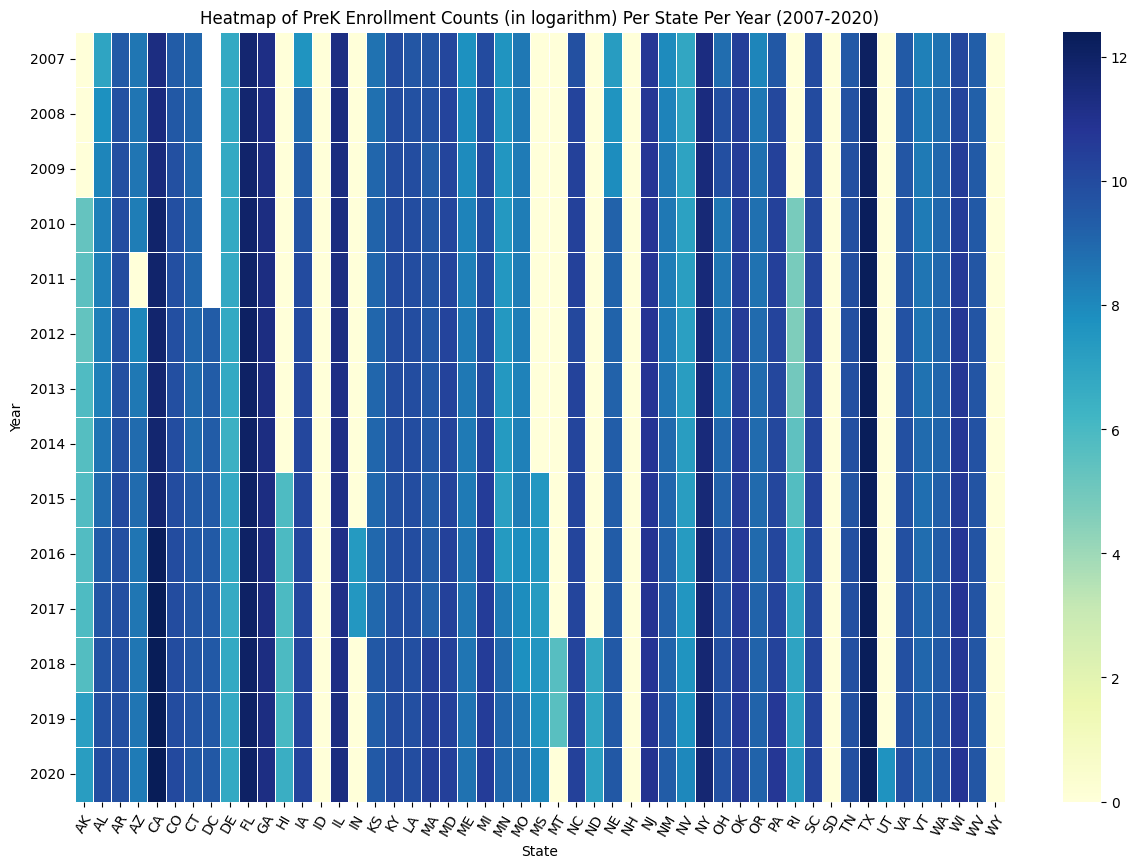

In [41]:
#Preschool Enrollment Analysis
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Pivot the data to get a matrix of years (rows) and states (columns)
pivot_table = prek_assess_social.pivot(index='Year', columns='STUSPS', values='PreK Enrollment')

plt.figure(figsize=(15, 10))

# Using logarithmic scale for color representation
# Adding a small constant to avoid taking log of zero
sns.heatmap(np.log(pivot_table + 1), cmap="YlGnBu", linewidths=.5)

# Modify axis labels for clarity
plt.xticks(rotation=60, ha='center')

# Extract year part from the date object and use it for y-axis labels
year_labels = [str(year.year) for year in pivot_table.index]
plt.yticks(ticks=np.arange(len(year_labels))+0.5, labels=year_labels, rotation=0)

# Adding titles and labels
plt.title('Heatmap of PreK Enrollment Counts (in logarithm) Per State Per Year (2007-2020)')
plt.xlabel('State')
plt.ylabel('Year')

Text(158.22222222222223, 0.5, 'Year')

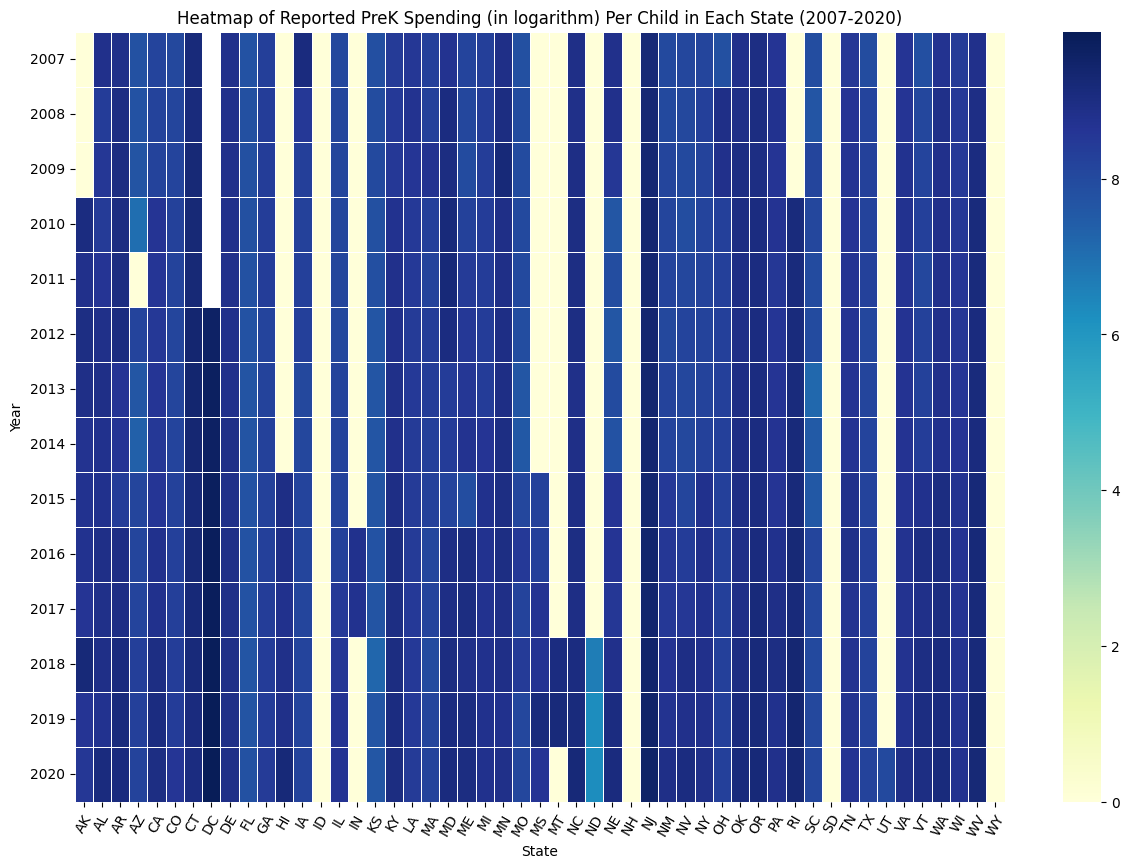

In [42]:
#Preschool Funding Analysis

# Pivot the data to get a matrix of years (rows) and states (columns)
pivot_table = prek_assess_social.pivot(index='Year', columns='STUSPS', values='Reported Spending Per Child in PreK')

plt.figure(figsize=(15, 10))

# Using logarithmic scale for color representation
# Adding a small constant to avoid taking log of zero
sns.heatmap(np.log(pivot_table + 1), cmap="YlGnBu", linewidths=.5)

# Modify axis labels for clarity
plt.xticks(rotation=60, ha='center')

# Extract year part from the date object and use it for y-axis labels
year_labels = [str(year.year) for year in pivot_table.index]
plt.yticks(ticks=np.arange(len(year_labels))+0.5, labels=year_labels, rotation=0)

# Adding titles and labels
plt.title('Heatmap of Reported PreK Spending (in logarithm) Per Child in Each State (2007-2020)')
plt.xlabel('State')
plt.ylabel('Year')

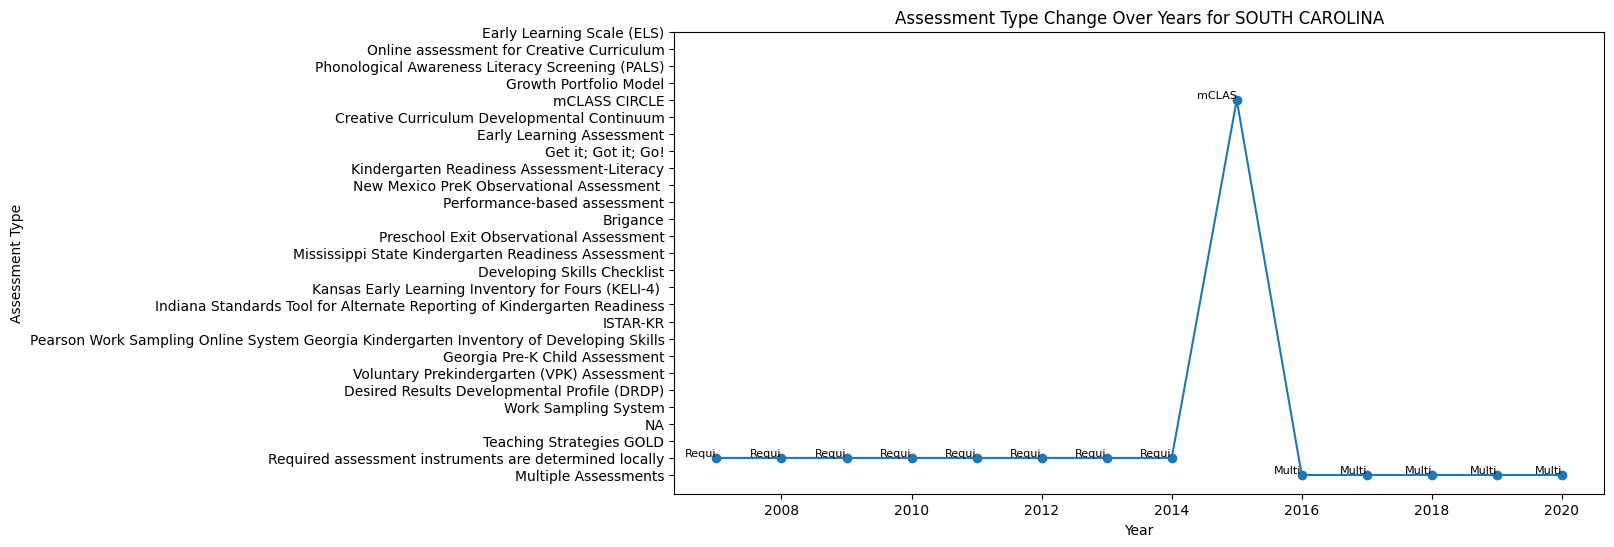

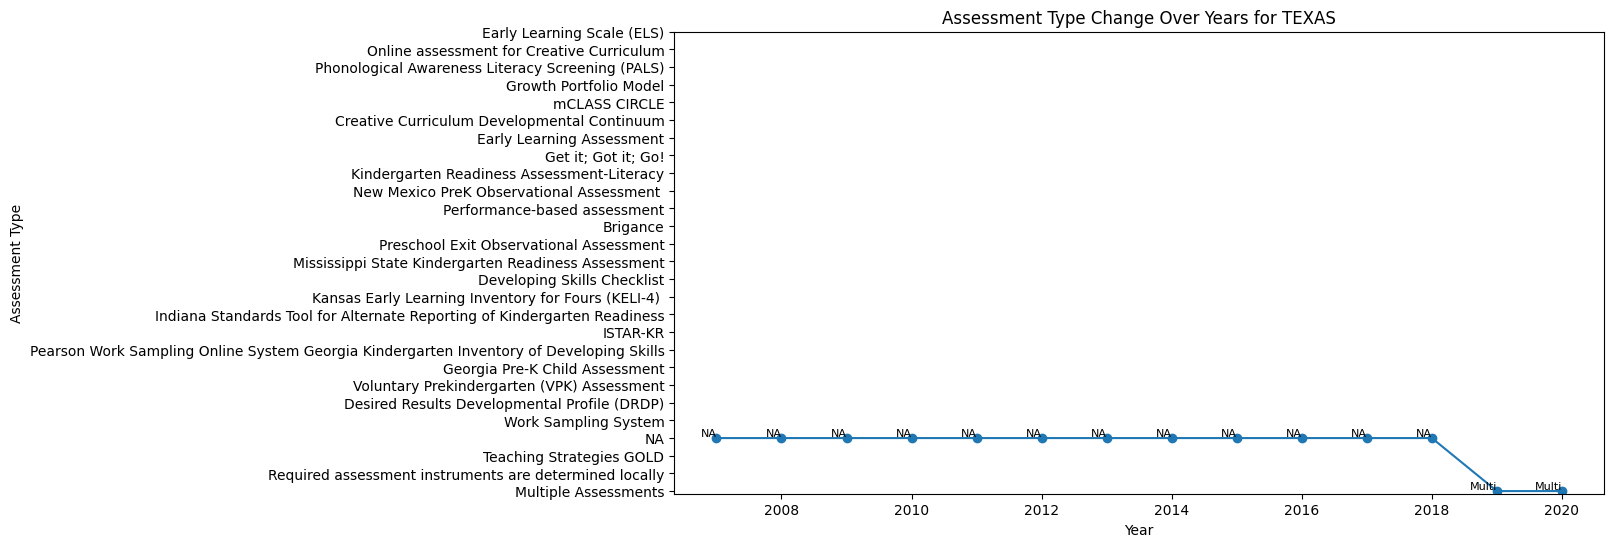

In [43]:
# Case analysis
# Texas and South Carolina
# They have assessment policy changes
# Texas chose to use multiple assessments since 2019,
# while South Carolna changed from other policies to multiple assessments since 2016 
# The change in enrollment and state funding did not increase as expected
# Assessment per year for each State from 2007 to 2020 (line graphs)
assessment_types = prek_assess_social['RequiredAssessmentforpreK'].unique()
type_to_num = {t: i for i, t in enumerate(assessment_types)}


# Apply the mapping
prek_assess_social['type_num'] = prek_assess_social['RequiredAssessmentforpreK'].map(type_to_num)

# Plotting
states = prek_assess_social['State'].unique()  
for state in states:
    if state == "TEXAS" or state == "SOUTH CAROLINA":
        state_data = prek_assess_social[prek_assess_social['State'] == state].sort_values('Year')
    
        plt.figure(figsize=(12, 6))
        plt.plot(state_data['Year'], state_data['type_num'], marker='o')
    
        # Add shortened labels for each point
        for x, y, label in zip(state_data['Year'], state_data['type_num'], state_data['RequiredAssessmentforpreK']):
            plt.text(x, y, label[:5], fontsize=8, ha='right', va='bottom')  # Only the first 5 characters of the label

        plt.title(f'Assessment Type Change Over Years for {state}')
        plt.xlabel('Year')
        plt.ylabel('Assessment Type')
        plt.yticks(range(len(assessment_types)), assessment_types)
    
        plt.show()

In [44]:
texas_data = prek_assess_social[prek_assess_social['State'] == 'TEXAS']
texas_data = texas_data[["Year", "State", "RequiredAssessmentforpreK", "PreK Enrollment", "Reported Spending Per Child in PreK"]]
texas_data

,Year,State,RequiredAssessmentforpreK,PreK Enrollment,Reported Spending Per Child in PreK
602,2007-01-01,TEXAS,NA,187238.0,2836.0
603,2008-01-01,TEXAS,NA,193363.0,3581.0
604,2009-01-01,TEXAS,NA,199975.0,3790.0
605,2010-01-01,TEXAS,NA,214172.0,3686.0
606,2011-01-01,TEXAS,NA,223799.0,3761.0
607,2012-01-01,TEXAS,NA,224648.0,3291.0
608,2013-01-01,TEXAS,NA,227176.0,3366.0
609,2014-01-01,TEXAS,NA,226213.0,3533.0
610,2015-01-01,TEXAS,NA,218410.0,3639.0
611,2016-01-01,TEXAS,NA,220640.0,4127.0


In [45]:
sc_data = prek_assess_social[prek_assess_social['State'] == 'SOUTH CAROLINA']
sc_data = sc_data[["Year", "State", "RequiredAssessmentforpreK", "PreK Enrollment", "Reported Spending Per Child in PreK"]]
sc_data

,Year,State,RequiredAssessmentforpreK,PreK Enrollment,Reported Spending Per Child in PreK
560,2007-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,21716.0,2702.0
561,2008-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,22590.0,2134.0
562,2009-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,24866.0,3409.0
563,2010-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,24563.0,3244.0
564,2011-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,26518.0,2934.0
565,2012-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,29121.0,2888.0
566,2013-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,27477.0,1300.0
567,2014-01-01,SOUTH CAROLINA,Required assessment instruments are determined...,27137.0,1817.0
568,2015-01-01,SOUTH CAROLINA,mCLASS CIRCLE,30422.0,1984.0
569,2016-01-01,SOUTH CAROLINA,Multiple Assessments,23536.0,3367.0


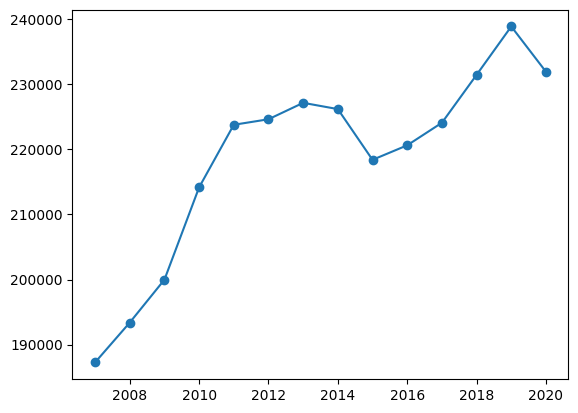

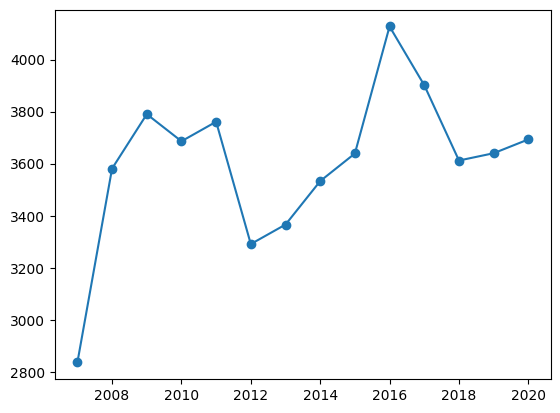

In [46]:
#Plot the annual change of enrollment and state spending (Texas: Policy changed since 2019)
dates = texas_data["Year"]
enrollment = texas_data["PreK Enrollment"]

plt.plot(dates, enrollment, marker='o')
plt.show()

spending = texas_data["Reported Spending Per Child in PreK"]

plt.plot(dates, spending, marker='o')
plt.show()

<Axes: xlabel='Year'>

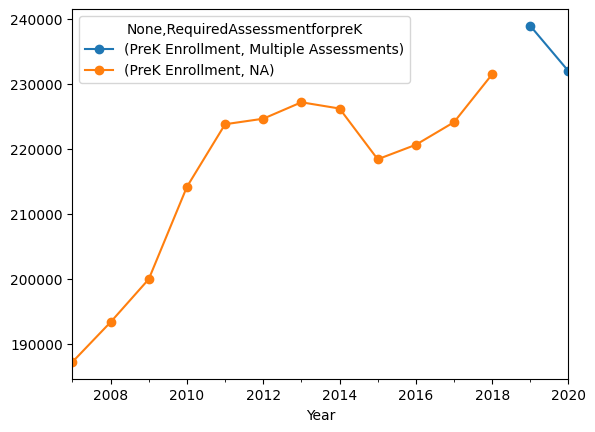

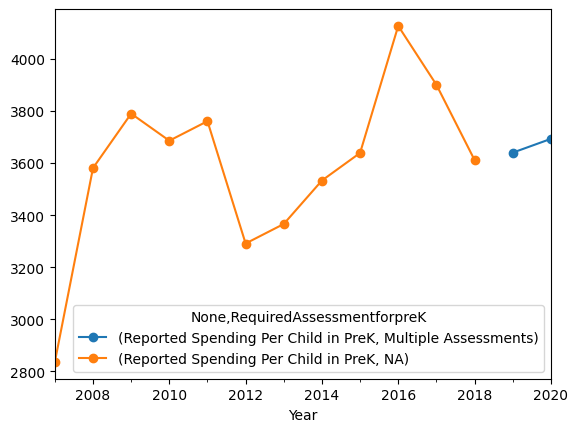

In [47]:
texas_data_enroll = texas_data.drop(columns = "Reported Spending Per Child in PreK")
texas_data_enroll.set_index(["Year", "RequiredAssessmentforpreK"]).unstack("RequiredAssessmentforpreK").plot(marker='o')

texas_data_fund = texas_data.drop(columns = "PreK Enrollment")
texas_data_fund.set_index(["Year",  "RequiredAssessmentforpreK"]).unstack("RequiredAssessmentforpreK").plot(marker='o')

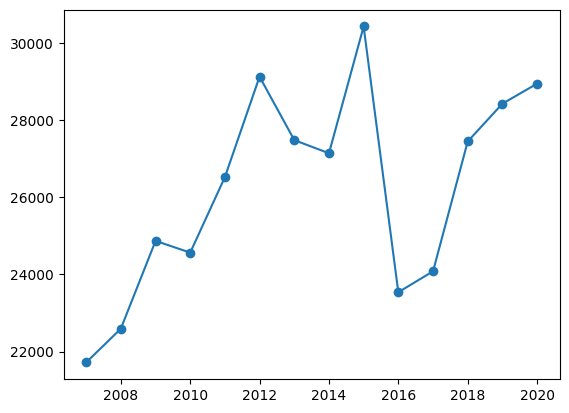

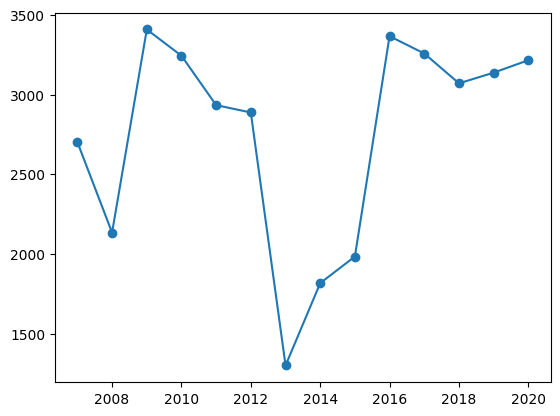

In [48]:
# SC: Policy changed since 2015 and 2016
dates = sc_data["Year"]
enrollment = sc_data["PreK Enrollment"]

plt.plot(dates, enrollment, marker='o')
plt.show()

spending = sc_data["Reported Spending Per Child in PreK"]

plt.plot(dates, spending,  marker='o')
plt.show()

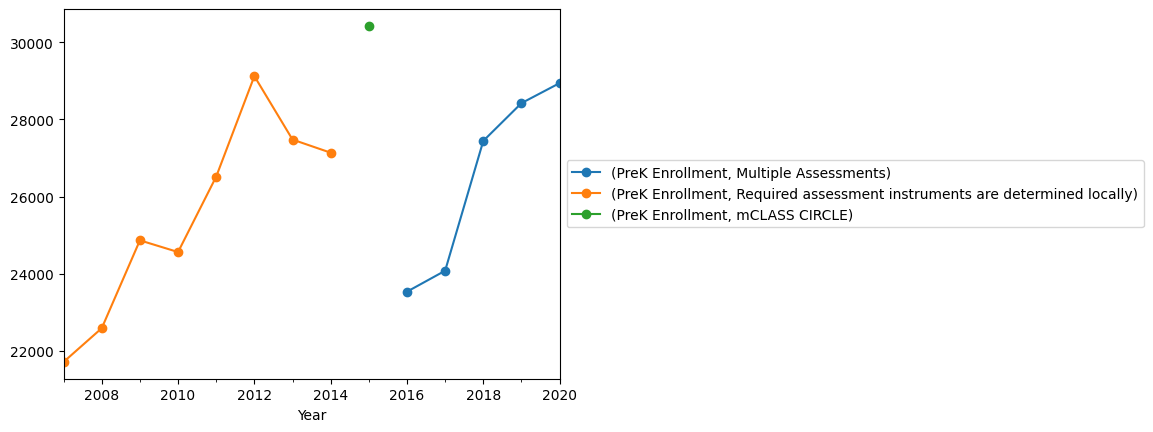

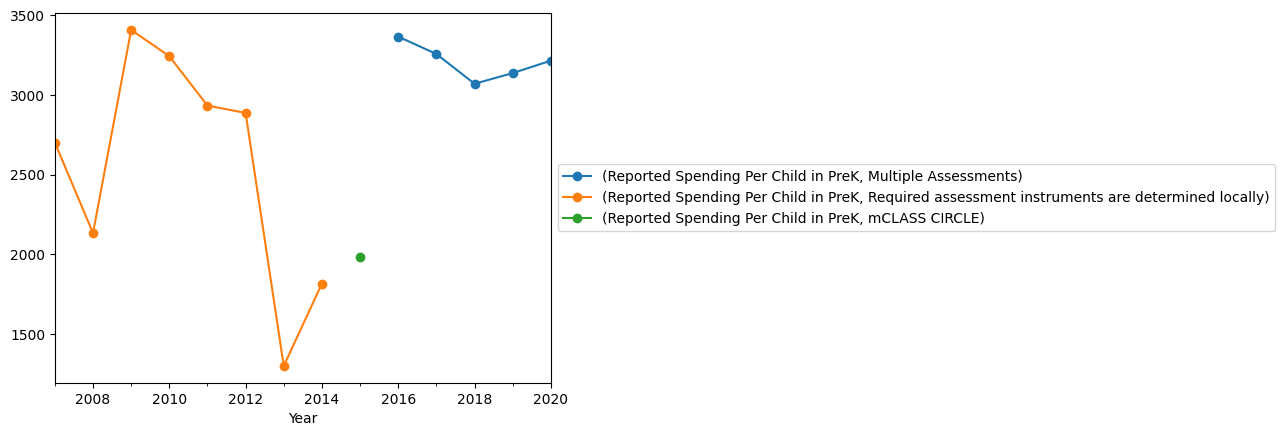

In [49]:
sc_data_enroll = sc_data.drop(columns = "Reported Spending Per Child in PreK")
ax1 = sc_data_enroll.set_index(["Year", "RequiredAssessmentforpreK"]).unstack("RequiredAssessmentforpreK").plot(marker='o')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sc_data_fund = sc_data.drop(columns = "PreK Enrollment")
ax2 = sc_data_fund.set_index(["Year",  "RequiredAssessmentforpreK"]).unstack("RequiredAssessmentforpreK").plot(marker='o')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [50]:
texas_sc_enroll = pd.concat([texas_data_enroll, sc_data_enroll], ignore_index = True)
texas_sc_enroll 

,Year,State,RequiredAssessmentforpreK,PreK Enrollment
0,2007-01-01,TEXAS,NA,187238.0
1,2008-01-01,TEXAS,NA,193363.0
2,2009-01-01,TEXAS,NA,199975.0
3,2010-01-01,TEXAS,NA,214172.0
4,2011-01-01,TEXAS,NA,223799.0
5,2012-01-01,TEXAS,NA,224648.0
6,2013-01-01,TEXAS,NA,227176.0
7,2014-01-01,TEXAS,NA,226213.0
8,2015-01-01,TEXAS,NA,218410.0
9,2016-01-01,TEXAS,NA,220640.0


In [51]:
texas_sc_enroll_filtered = texas_sc_enroll[(texas_sc_enroll['Year'].dt.year >= 2007) & (texas_sc_enroll['Year'].dt.year <= 2018)]

In [52]:
texas_sc_enroll_filtered

,Year,State,RequiredAssessmentforpreK,PreK Enrollment
0,2007-01-01,TEXAS,NA,187238.0
1,2008-01-01,TEXAS,NA,193363.0
2,2009-01-01,TEXAS,NA,199975.0
3,2010-01-01,TEXAS,NA,214172.0
4,2011-01-01,TEXAS,NA,223799.0
5,2012-01-01,TEXAS,NA,224648.0
6,2013-01-01,TEXAS,NA,227176.0
7,2014-01-01,TEXAS,NA,226213.0
8,2015-01-01,TEXAS,NA,218410.0
9,2016-01-01,TEXAS,NA,220640.0


In [53]:
texas_sc_enroll_filtered

,Year,State,RequiredAssessmentforpreK,PreK Enrollment
0,2007-01-01,TEXAS,NA,187238.0
1,2008-01-01,TEXAS,NA,193363.0
2,2009-01-01,TEXAS,NA,199975.0
3,2010-01-01,TEXAS,NA,214172.0
4,2011-01-01,TEXAS,NA,223799.0
5,2012-01-01,TEXAS,NA,224648.0
6,2013-01-01,TEXAS,NA,227176.0
7,2014-01-01,TEXAS,NA,226213.0
8,2015-01-01,TEXAS,NA,218410.0
9,2016-01-01,TEXAS,NA,220640.0


In [54]:
# Create the 'treated' variable for South Carolina
texas_sc_enroll_filtered['Treated'] = (texas_sc_enroll_filtered['State'] == 'SOUTH CAROLINA').astype(int)

# Create the 'post_treatment' variable for years 2016 and onwards
texas_sc_enroll_filtered['Post_Treatment'] = (texas_sc_enroll_filtered['Year'].dt.year >= 2016).astype(int)

# Create the interaction term for DiD
texas_sc_enroll_filtered['Treatment_x_Post'] = texas_sc_enroll_filtered['Treated'] * texas_sc_enroll_filtered['Post_Treatment']

/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_2563/4065600672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_sc_enroll_filtered['Treated'] = (texas_sc_enroll_filtered['State'] == 'SOUTH CAROLINA').astype(int)
/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_2563/4065600672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_sc_enroll_filtered['Post_Treatment'] = (texas_sc_enroll_filtered['Year'].dt.year >= 2016).astype(int)
/var/folders/97/r7d175650dg4fx0f_n5km01w0000

In [55]:
texas_sc_enroll_filtered

,Year,State,RequiredAssessmentforpreK,PreK Enrollment,Treated,Post_Treatment,Treatment_x_Post
0,2007-01-01,TEXAS,NA,187238.0,0,0,0
1,2008-01-01,TEXAS,NA,193363.0,0,0,0
2,2009-01-01,TEXAS,NA,199975.0,0,0,0
3,2010-01-01,TEXAS,NA,214172.0,0,0,0
4,2011-01-01,TEXAS,NA,223799.0,0,0,0
5,2012-01-01,TEXAS,NA,224648.0,0,0,0
6,2013-01-01,TEXAS,NA,227176.0,0,0,0
7,2014-01-01,TEXAS,NA,226213.0,0,0,0
8,2015-01-01,TEXAS,NA,218410.0,0,0,0
9,2016-01-01,TEXAS,NA,220640.0,0,1,0


In [76]:
grouped_df = texas_sc_enroll_filtered.groupby(['Post_Treatment', 'Treated'])['PreK Enrollment'].mean().reset_index()
grouped_df.set_index(["Treated","Post_Treatment"]).unstack("Post_Treatment")

PreK Enrollment               
Post_Treatment               0              1
Treated                                      
0                212777.111111  225413.000000
1                 26045.555556   25019.333333

In [57]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
formula = 'Q("PreK Enrollment") ~ Treated + Post_Treatment + Treatment_x_Post'

# Fit the DiD model using Ordinary Least Squares (OLS)
did_model_enroll = smf.ols(formula, data=texas_sc_enroll_filtered).fit()

# Print the summary of the regression results
print(did_model_enroll.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("PreK Enrollment")   R-squared:                       0.991
Model:                              OLS   Adj. R-squared:                  0.989
Method:                   Least Squares   F-statistic:                     719.4
Date:                  Wed, 22 Nov 2023   Prob (F-statistic):           1.57e-20
Time:                          23:33:57   Log-Likelihood:                -253.00
No. Observations:                    24   AIC:                             514.0
Df Residuals:                        20   BIC:                             518.7
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.

In [61]:
texas_sc_fund = pd.concat([texas_data_fund, sc_data_fund], ignore_index = True)
texas_sc_fund

,Year,State,RequiredAssessmentforpreK,Reported Spending Per Child in PreK
0,2007-01-01,TEXAS,NA,2836.0
1,2008-01-01,TEXAS,NA,3581.0
2,2009-01-01,TEXAS,NA,3790.0
3,2010-01-01,TEXAS,NA,3686.0
4,2011-01-01,TEXAS,NA,3761.0
5,2012-01-01,TEXAS,NA,3291.0
6,2013-01-01,TEXAS,NA,3366.0
7,2014-01-01,TEXAS,NA,3533.0
8,2015-01-01,TEXAS,NA,3639.0
9,2016-01-01,TEXAS,NA,4127.0


In [63]:
texas_sc_fund_filtered = texas_sc_fund[(texas_sc_fund['Year'].dt.year >= 2007) & (texas_sc_fund['Year'].dt.year <= 2018)]
texas_sc_fund_filtered

,Year,State,RequiredAssessmentforpreK,Reported Spending Per Child in PreK
0,2007-01-01,TEXAS,NA,2836.0
1,2008-01-01,TEXAS,NA,3581.0
2,2009-01-01,TEXAS,NA,3790.0
3,2010-01-01,TEXAS,NA,3686.0
4,2011-01-01,TEXAS,NA,3761.0
5,2012-01-01,TEXAS,NA,3291.0
6,2013-01-01,TEXAS,NA,3366.0
7,2014-01-01,TEXAS,NA,3533.0
8,2015-01-01,TEXAS,NA,3639.0
9,2016-01-01,TEXAS,NA,4127.0


In [64]:
# Create the 'treated' variable for South Carolina
texas_sc_fund_filtered['Treated'] = (texas_sc_fund_filtered['State'] == 'SOUTH CAROLINA').astype(int)

# Create the 'post_treatment' variable for years 2016 and onwards
texas_sc_fund_filtered['Post_Treatment'] = (texas_sc_fund_filtered['Year'].dt.year >= 2016).astype(int)

# Create the interaction term for DiD
texas_sc_fund_filtered['Treatment_x_Post'] = texas_sc_fund_filtered['Treated'] * texas_sc_enroll_filtered['Post_Treatment']

/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_2563/2003956655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_sc_fund_filtered['Treated'] = (texas_sc_fund_filtered['State'] == 'SOUTH CAROLINA').astype(int)
/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipykernel_2563/2003956655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texas_sc_fund_filtered['Post_Treatment'] = (texas_sc_fund_filtered['Year'].dt.year >= 2016).astype(int)
/var/folders/97/r7d175650dg4fx0f_n5km01w0000gn/T/ipy

In [66]:
texas_sc_fund_filtered

,Year,State,RequiredAssessmentforpreK,Reported Spending Per Child in PreK,Treated,Post_Treatment,Treatment_x_Post
0,2007-01-01,TEXAS,NA,2836.0,0,0,0
1,2008-01-01,TEXAS,NA,3581.0,0,0,0
2,2009-01-01,TEXAS,NA,3790.0,0,0,0
3,2010-01-01,TEXAS,NA,3686.0,0,0,0
4,2011-01-01,TEXAS,NA,3761.0,0,0,0
5,2012-01-01,TEXAS,NA,3291.0,0,0,0
6,2013-01-01,TEXAS,NA,3366.0,0,0,0
7,2014-01-01,TEXAS,NA,3533.0,0,0,0
8,2015-01-01,TEXAS,NA,3639.0,0,0,0
9,2016-01-01,TEXAS,NA,4127.0,0,1,0


In [77]:
grouped_df = texas_sc_fund_filtered.groupby(['Post_Treatment', 'Treated'])['Reported Spending Per Child in PreK'].mean().reset_index()
grouped_df.set_index(["Treated","Post_Treatment"]).unstack("Post_Treatment")

Reported Spending Per Child in PreK        
Post_Treatment                                   0       1
Treated                                                   
0                                      3498.111111  3880.0
1                                      2490.222222  3232.0

In [65]:
formula = 'Q("Reported Spending Per Child in PreK") ~ Treated + Post_Treatment + Treatment_x_Post'

# Fit the DID model using Ordinary Least Squares (OLS)
did_model_fund = smf.ols(formula, data=texas_sc_fund_filtered).fit()

# Print the summary of the regression results
print(did_model_fund.summary())

                                       OLS Regression Results                                       
Dep. Variable:     Q("Reported Spending Per Child in PreK")   R-squared:                       0.572
Model:                                                  OLS   Adj. R-squared:                  0.508
Method:                                       Least Squares   F-statistic:                     8.900
Date:                                      Wed, 22 Nov 2023   Prob (F-statistic):           0.000600
Time:                                              23:37:49   Log-Likelihood:                -180.92
No. Observations:                                        24   AIC:                             369.8
Df Residuals:                                            20   BIC:                             374.6
Df Model:                                                 3                                         
Covariance Type:                                  nonrobust                                

The increase in resources was more pronounced in the state implementing multiple assessments (South Carolina), though this change was not statistically significant. Unexpectedly, the average enrollment in South Carolina decreased, although this change was also not statistically significant.

From 2007 to 2018, changes in assessment policies did not lead to improvements in student enrollment or resource allocation. Additionally, during 2019-2020, Texas implemented multiple assessments, resulting in a decrease in enrollment, but total funding remained stable. It appears that the two states may not be the best counterparts in the Difference-in-Differences (DID) design.

In our follow-up project, we will employ probit regression to investigate a state that maintained a single assessment policy from 2007 to 2020. Specifically, we will examine California, which consistently used the DRDP (Desired Results Developmental Profile) assessment. This choice is informed by the need for a consistent policy environment in the DID analysis.
